In [1]:
from sklearn.metrics import (
    plot_precision_recall_curve, precision_recall_curve, confusion_matrix, classification_report)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Results Analyis
results_df = pd.read_csv("output/exp41_results.csv")
results_df

,Unnamed: 0,Label_0,Label_1,Label_2,Label_3,Label_4,y_predicted,label,mid,pid,sent_by,lang,text
0,0,0.040892,0.160963,0.282980,0.137419,0.377747,4,2,202626,3745,participant,english,Meaning of latching please Newborn skin often ...
1,1,0.040890,0.160955,0.282977,0.137419,0.377759,4,3,199398,3673,participant,swahili,Kuosha Mara tu mtoto anapozaliwa unaweza zuia ...
2,2,0.040892,0.160963,0.282980,0.137418,0.377747,4,2,200672,3701,participant,english,Thank you what about the second question? Than...
3,3,0.040891,0.160963,0.282980,0.137418,0.377748,4,3,189864,3424,participant,english,Rachuonyo sub county hospital unless otherwise...
4,4,0.040892,0.160963,0.282980,0.137418,0.377748,4,4,209192,3993,participant,english,Okay thank you for your concern please Severe ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,2332,0.040892,0.160963,0.282980,0.137419,0.377747,4,0,204535,3795,participant,english,"No Regular, strong abdominal pains are a sign ..."
2333,2333,0.040889,0.160955,0.282976,0.137420,0.377760,4,2,180561,3208,participant,swahili,Hakuna kuweka spirit. Watoto wachanga wanafaa ...
2334,2334,0.040890,0.160956,0.282977,0.137420,0.377758,4,4,38237,349,participant,swahili,nisawa Wiki hii SMS zitaacha Tafadhali kuja u...
2335,2335,0.040892,0.160963,0.282980,0.137418,0.377747,4,4,157814,2728,participant,english,Thank you We really appreciate your messages a...


In [3]:
pd.crosstab(results_df.label, results_df.y_predicted)

y_predicted,4
label,
0,102
1,398
2,641
3,331
4,865


In [4]:
from sklearn.metrics import classification_report
print(classification_report(results_df.label, results_df.y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.00      0.00      0.00       398
           2       0.00      0.00      0.00       641
           3       0.00      0.00      0.00       331
           4       0.37      1.00      0.54       865

    accuracy                           0.37      2337
   macro avg       0.07      0.20      0.11      2337
weighted avg       0.14      0.37      0.20      2337



C:\Users\nngao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nngao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nngao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

<AxesSubplot: xlabel='label', ylabel='Count'>

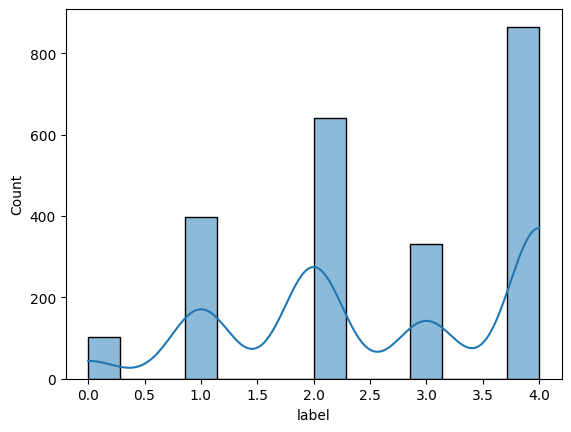

In [5]:
sns.histplot(data=results_df, x="label", kde=True)

In [6]:
results_df_pi = results_df
results_df_pi = results_df_pi.melt(id_vars=['mid','label', 'y_predicted', 'pid', 'sent_by', 'lang', 'text'], 
                   value_vars=['Label_0', 'Label_1', 'Label_2', 'Label_3', 'Label_4'], var_name='variable', value_name='value')

results_df_pi

,mid,label,y_predicted,pid,sent_by,lang,text,variable,value
0,202626,2,4,3745,participant,english,Meaning of latching please Newborn skin often ...,Label_0,0.040892
1,199398,3,4,3673,participant,swahili,Kuosha Mara tu mtoto anapozaliwa unaweza zuia ...,Label_0,0.040890
2,200672,2,4,3701,participant,english,Thank you what about the second question? Than...,Label_0,0.040892
3,189864,3,4,3424,participant,english,Rachuonyo sub county hospital unless otherwise...,Label_0,0.040891
4,209192,4,4,3993,participant,english,Okay thank you for your concern please Severe ...,Label_0,0.040892
...,...,...,...,...,...,...,...,...,...
11680,204535,0,4,3795,participant,english,"No Regular, strong abdominal pains are a sign ...",Label_4,0.377747
11681,180561,2,4,3208,participant,swahili,Hakuna kuweka spirit. Watoto wachanga wanafaa ...,Label_4,0.377760
11682,38237,4,4,349,participant,swahili,nisawa Wiki hii SMS zitaacha Tafadhali kuja u...,Label_4,0.377758
11683,157814,4,4,2728,participant,english,Thank you We really appreciate your messages a...,Label_4,0.377747


<AxesSubplot: xlabel='label', ylabel='value'>

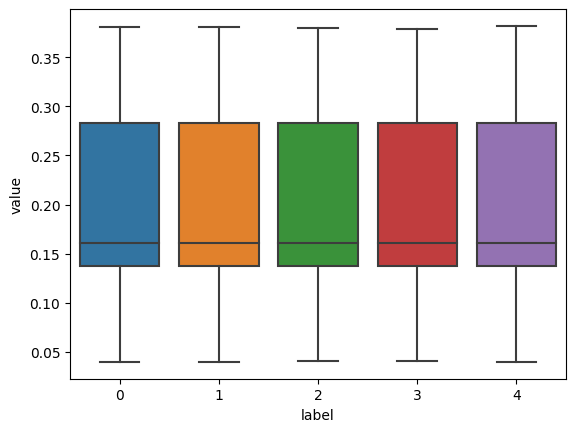

In [7]:
sns.boxplot(data=results_df_pi, x="label", y="value")